Social Network Ads 
Naive Baeyes Classifier

Accuracy -  0.8892857142857142

 Confusion Matrix : 

[[77  6]
 [ 8 29]]

Roc-Auc-Score:  0.9511559752523608



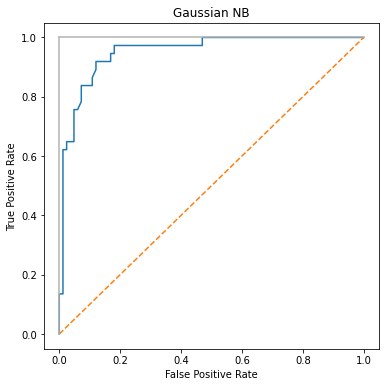



Decission Tree

Accuracy -  0.8916666666666667

 Confusion Matrix : 

 [[75  8]
 [ 5 32]]

Roc-Auc-Score:  0.8842396613480951



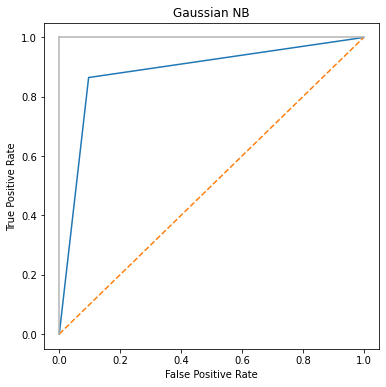



Cross Validation accuracy scores: [0.89285714 0.78571429 0.89285714 0.92857143 0.96428571 0.85714286
 0.92857143 0.92857143 0.89285714 1.        ]

Accuracy of Random forest classifier is 0.9404761904761905


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#Dataframe creation
df = pd.read_csv("/content/Social_Network_Ads.csv")
df = df.dropna()

# Train test split 
y = df.Purchased
x = df.drop(['Purchased'],axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = 0.3, random_state=255)

# Gaussian model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

y_val_pred = gnb.predict(X_val)
y_train_pred = gnb.predict(X_train)

# Prediction and Confusion Matrix
print("Social Network Ads ")
print("Naive Baeyes Classifier")
print(f"\nAccuracy - ", gnb.score(X_train, Y_train))
print(f"\n Confusion Matrix : \n")
con_matrix = confusion_matrix(Y_val,y_val_pred)
print(con_matrix)

#Plotting of AUCROC
y_score = gnb.predict_proba(X_val)[ :,1]

false_positive, true_positive, threshold = roc_curve(Y_val, y_score)
print("\nRoc-Auc-Score: ", roc_auc_score(Y_val, y_score))
print()

plt.subplots(1, figsize = (6, 6))
plt.title("Gaussian NB")
plt.plot(false_positive, true_positive)
plt.plot([0, 1], ls = "--")
plt.plot([0,0], [1,0], c="0.7"), plt.plot([1,1], c="0.7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

y_val_pred = dt.predict(X_val)

#Prediction and Confusion Matrix
print("\n\nDecission Tree")
print(f"\nAccuracy - ", dt.score(X_val, Y_val))
print(f"\n Confusion Matrix : ")
print("\n", confusion_matrix(Y_val, y_val_pred))


#Plotting of AUCROC
y_score = dt.predict_proba(X_val)[ :,1]

false_positive, true_positive, threshold = roc_curve(Y_val, y_score)
print("\nRoc-Auc-Score: ", roc_auc_score(Y_val, y_score))
print()

plt.subplots(1, figsize = (6, 6))
plt.title("Gaussian NB")
plt.plot(false_positive, true_positive)
plt.plot([0, 1], ls = "--")
plt.plot([0,0], [1,0], c="0.7"), plt.plot([1,1], c="0.7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Kfolds cross validation
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
X = X_train
y = Y_train
scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=1)
print('\n\nCross Validation accuracy scores: %s' % scores) 

# Random Forest Classifier
m = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
m.fit(X_train, y_train)
print(f"\nAccuracy of Random forest classifier is {m.score(X_test, y_test)}")